# Dataset exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
from collections import Counter

In [3]:
custom_df = pd.read_csv(train_labels_path)
random_sample = custom_df_test.sample(n=1)
img_name = random_sample['Image'].iloc[0]
img = cv2.imread(
    image_path + "/" + img_name, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (resize_size, resize_size))

NameError: name 'train_labels_path' is not defined

In [19]:
train_data_dir = 'data/train'
train_labels_path = "data/train.csv"

In [88]:
''' Plot functions '''
def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(train_data_dir + "/" + filename) for filename in filenames]
    
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

In [32]:
def import_labels(label_path):
    """ This function import labels from csv / Create a list of unique
    labels and a dict with image_name and its label
    Output : dict('image_name': 'label')
    """
    labels_df = pd.read_csv(label_path)
    dict_labels = labels_df.set_index('Image').to_dict()['Id']
    unique_labels = sorted(list(set(dict_labels.values())))
    for index, label in dict_labels.items():
        dict_labels[index] = unique_labels.index(label)
    return dict_labels, unique_labels

## Image features exploration

In [95]:
def import_images(image_folder, resize_size, nb_images):
    """ Import images from a folder
    Output : dict('image_name': IMAGE (List of pixels))
    """
    image_dict = {}
    i = 0
    for element in os.listdir(image_folder):
        if i < nb_images:
            img = cv2.imread(
                image_folder + "/" + element)
            img = cv2.resize(img, (resize_size, resize_size))
            img = img.astype(np.float32)
            image_dict[element] = img
            i += 1
        else:
            break
    return image_dict

In [89]:
train_df = pd.read_csv(train_labels_path)
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 2 columns):
Image    9850 non-null object
Id       9850 non-null object
dtypes: object(2)
memory usage: 154.0+ KB


In [91]:
train_df.describe()

,Image,Id
count,9850,9850
unique,9850,4251
top,a7a6bc3e.jpg,new_whale
freq,1,810


Some images plotted

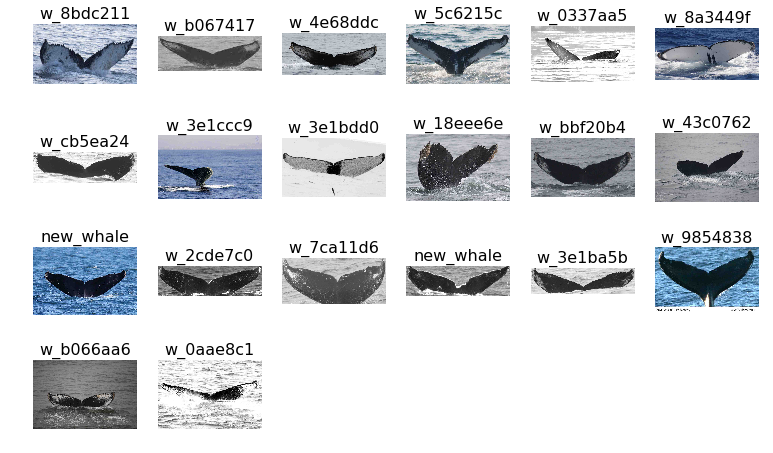

In [94]:
rand_rows = train_df.sample(frac=1.)[:20]
imgs = list(rand_rows['Image'])
labels = list(rand_rows['Id'])

plot_images_for_filenames(imgs, labels)
plt.show()

Let's explore colours of images (gray, colour), by studying channels

In [101]:
def is_grey_scale(img_path):
    """https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

In [149]:
i = 0
nb_color = 0
nb_gray = 0
for img in train_df['Image']:
    if i < 500:
        if is_grey_scale(train_data_dir + '/' + img):
            nb_gray += 1
        else:
            nb_color += 1
        i += 1
    else:
        break

In [156]:
print("Proportion d'images noir et blanc : ", nb_gray/(nb_color+nb_gray))

Proportion d'images noir et blanc :  0.496


Let's explore Image size

In [127]:
sizes = []
for img in train_df['Image']:
    img = cv2.imread(train_data_dir + "/" +img)
    x = img.shape[0]
    y = img.shape[1]
    sizes.append((x, y))

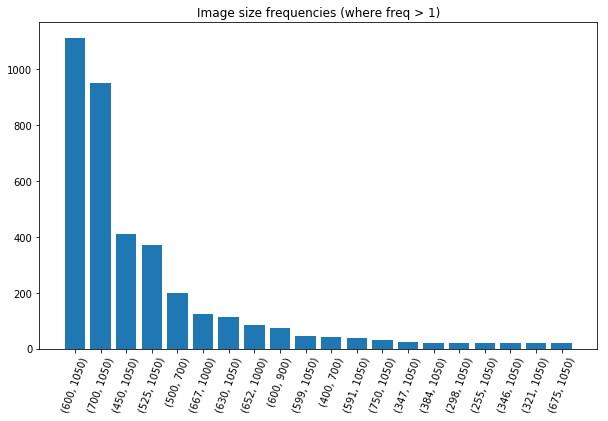

In [130]:
counter_size = Counter(sizes)
size, freq = zip(*Counter({i: v for i, v in counter_size.items() if v > 1}).most_common(20))

plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)
plt.title("Image size frequencies (where freq > 1)")

plt.show()

### Visualize different whales humpback

## Information on classes

In [135]:
nb_classes = len(train_df['Id'].unique())
print('Number of classes : ' + str(len(train_df['Id'])))
print('Number of unique classes : ' + str(nb_classes))


Number of classes : 9850
Number of unique classes : 4251


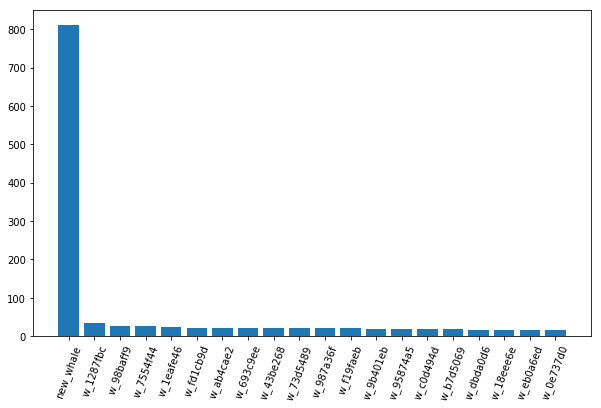

In [144]:
size_buckets = Counter(train_df['Id'])
size, freq = zip(*Counter({i: v for i, v in size_buckets.items() if v > 1}).most_common(20))

plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)


plt.show()

In [145]:
train_df['Id'].value_counts().head(3)

new_whale    810
w_1287fbc     34
w_98baff9     27
Name: Id, dtype: int64

## Conclusion
Very few images by classes (a lot for new_whale : 810) and then it directly decreases to 34 images for w_1287fbc.
Images don't have the same size so --> Resize
Color --> GrayScale
Data augmentation : Crop, translation, rotation, blur, jittering, etc.